# Introduction

This exercise will require you to pull some data from the Qunadl API. Qaundl is currently the most widely used aggregator of financial market data.

As a first step, you will need to register a free account on the http://www.quandl.com website.

Qaundl has a large number of data sources, but, unfortunately, most of them require a Premium subscription. Still, there are also a good number of free datasets.

For this mini project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.

You can find the detailed Quandl API instructions here: https://docs.quandl.com/docs/time-series

While there is a dedicated Python package for connecting to the Quandl API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/ ).
Also, since you won't have access to DataFrames, you are encouraged to us Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

These are your tasks for this mini project:

1. ✅ Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. ✅ Convert the returned JSON object into a Python dictionary.
3. ✅ Calculate what the highest and lowest opening prices were for the stock in this period.
4. ✅ What was the largest change in any one day (based on High and Low price)?
5. ✅ What was the largest change between any two days (based on Closing Price)?
6. ✅ What was the average daily trading volume during this year?
7. ✅ (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

# Secrets

<div class="alert alert-block alert-danger">
<b>API KEYS ARE SECRETS, DO NOT PUT THEM AS TEXT IN THIS NOTEBOOK</b></div>

Yes, it is simplest to copy/paste your API key into this notebook and remember to delete it before committing to Github. But that is what is called a very "fragile" setup. If you forget once 💥 you're toast. Bots scraping GitHub will capture that key and abuse it in **SECONDS**. Never print your API key or any secret in a notebook. These are secrets, and secrets are never shared.

There is a better way, and it's best you learn about it right now using your newly acquired knowledge about the shell, command line, and Python.

Here's a great article: <https://www.askpython.com/python/python-dotenv-module>

In [1]:
# import the load_dotenv from the python-dotenv module
from dotenv import load_dotenv
 
# using existing module to specify location of the .env file
from pathlib import Path
import os

load_dotenv()
env_path = Path('.')/'.env'
load_dotenv(dotenv_path=env_path)
API_KEY = None
DOMAIN = None

<div class="alert alert-block alert-danger">
<b></b></div>

After you register, you will be provided with a unique API key, that you should store:

In [2]:
# Store the API key as a string - according to PEP8, constants are always named in all upper case
#
# API_KEY = 'YOUR_API_KEY_HERE'  # !!! DO NOT DO THIS !!! #

# Do this instead...
# retrieving keys and adding them to the project
# from the .env file through their key names
API_KEY = os.getenv("API_KEY")
DOMAIN = os.getenv("DOMAIN")

In [3]:
# First, import the relevant modules
import json
import requests

Note: API's can change a bit with each version, for this exercise it is reccomended to use the "V3" quandl api at `https://www.quandl.com/api/v3/`

# Collect Data

In [4]:
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned

# define some helpful constants
DATABASE = "FSE"
SYMBOL = "AFX_X"
FORMAT = "json"

# build a url to call
# DO NOT PRINT THIS VARIABLE, it has your key in it
url = f"{DOMAIN}/datasets/{DATABASE}/{SYMBOL}/data.{FORMAT}?api_key={API_KEY}"

# make the call
response = requests.get(url)

# did you get anything?
if response.status_code != 200:
    print(
        f"Oops, received status code {response.status_code}, something went wrong"
    )
    print(response.text)
else:
    print(f"Hooray! I have data with size {len(response.text)}")

# what's in the response?


Hooray! I have data with size 381932


In [5]:
# Inspect the JSON structure of the object you created, and take note of how nested it is,
# as well as the overall structure
for k, v in response.json().items():
    print(k, len(v))

dataset_data 10


In [6]:
for k in response.json()["dataset_data"].keys():
    print(k)

limit
transform
column_index
column_names
start_date
end_date
frequency
data
collapse
order


# Convert Data

In [7]:
# convert to a dictionary using the builtin .json() method
afxx_data = response.json()["dataset_data"]

In [8]:
# look at a snapshot of the data
afxx_data["data"][:3]

[['2020-12-01',
  112.2,
  112.2,
  111.5,
  112.0,
  None,
  51.0,
  5703.0,
  None,
  None,
  None],
 ['2020-11-30',
  111.0,
  113.6,
  111.0,
  112.1,
  None,
  315.0,
  35111.5,
  None,
  None,
  None],
 ['2020-11-27',
  111.0,
  111.5,
  109.5,
  111.2,
  None,
  155.0,
  17168.5,
  None,
  None,
  None]]

In [9]:
# let's remind ourselves of the list index ordering
for idx, column in enumerate(afxx_data["column_names"]):
    print(f"index {idx} --> {column}")

index 0 --> Date
index 1 --> Open
index 2 --> High
index 3 --> Low
index 4 --> Close
index 5 --> Change
index 6 --> Traded Volume
index 7 --> Turnover
index 8 --> Last Price of the Day
index 9 --> Daily Traded Units
index 10 --> Daily Turnover


In [10]:
# we only want 2017 data; dates in "column" 0
afxx_data_2017 = [x for x in afxx_data["data"] if "2017" in x[0]]

In [11]:
# confirm the date range
[x[0] for x in afxx_data_2017]

['2017-12-29',
 '2017-12-28',
 '2017-12-27',
 '2017-12-22',
 '2017-12-21',
 '2017-12-20',
 '2017-12-19',
 '2017-12-18',
 '2017-12-15',
 '2017-12-14',
 '2017-12-13',
 '2017-12-12',
 '2017-12-11',
 '2017-12-08',
 '2017-12-07',
 '2017-12-06',
 '2017-12-05',
 '2017-12-04',
 '2017-12-01',
 '2017-11-30',
 '2017-11-29',
 '2017-11-28',
 '2017-11-27',
 '2017-11-24',
 '2017-11-23',
 '2017-11-22',
 '2017-11-21',
 '2017-11-20',
 '2017-11-17',
 '2017-11-16',
 '2017-11-15',
 '2017-11-14',
 '2017-11-13',
 '2017-11-10',
 '2017-11-09',
 '2017-11-08',
 '2017-11-07',
 '2017-11-06',
 '2017-11-03',
 '2017-11-02',
 '2017-11-01',
 '2017-10-30',
 '2017-10-27',
 '2017-10-26',
 '2017-10-25',
 '2017-10-24',
 '2017-10-23',
 '2017-10-20',
 '2017-10-19',
 '2017-10-18',
 '2017-10-17',
 '2017-10-16',
 '2017-10-13',
 '2017-10-12',
 '2017-10-11',
 '2017-10-10',
 '2017-10-09',
 '2017-10-06',
 '2017-10-05',
 '2017-10-04',
 '2017-10-02',
 '2017-09-29',
 '2017-09-28',
 '2017-09-27',
 '2017-09-26',
 '2017-09-25',
 '2017-09-

# High/Low Open Prices

A reminder on indices:
- index 1 --> Open

In [12]:
# find the index (idx) we want
idx = afxx_data['column_names'].index('Open')

# list comprehension to the rescue!
# the magical looking `if x[1]` is a cheap way to test for `None` values
idx = afxx_data['column_names'].index('Open')
open_prices = [x[idx] for x in afxx_data_2017 if x[idx]]

# print results
print(f"2017 max open price: {max(open_prices):.2f}")
print(f"2017 min open price: {min(open_prices):.2f}")

2017 max open price: 53.11
2017 min open price: 34.00


# Largest Interday Price Change

A reminder on indices:
- index 2 --> High
- index 3 --> Low

In [13]:
# find the index (idx) we want
high_idx = afxx_data['column_names'].index('High')
low_idx = afxx_data['column_names'].index('Low')

# daily price diff is high-low
interday_price_diffs = [x[high_idx] - x[low_idx] for x in afxx_data_2017 if x[high_idx] and x[low_idx]]

# print result
print(f"2017 largest interday price diff: {max(interday_price_diffs):.2f}")

2017 largest interday price diff: 2.81


# Largest Day-to-Day Price Change

Reminder of indices:
- index 4 --> Close
- index 5 --> Change

We have a couple options, let's try them both for fun:
1. Assume the `"Change"` value is the day-to-day change, in which case all we need is the `max` of that value.
2. Calculate the daily close price change ourselves and take that `max`.


These should be the same... right?

In [14]:
# find the index (idx) we want
idx = afxx_data['column_names'].index('Change')

# assume the change is right
daily_price_changes = [x[idx] for x in afxx_data_2017]
print(f"2017 largest daily price diff: {max(daily_price_changes):.2f}")

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

Well, look at that. The field is not populated :(

In [15]:
# find the index (idx) we want
idx = afxx_data['column_names'].index('Close')

# calculate price changes ourselves
daily_price_changes = []

# there is no "current price", so we start with `None`
yesterdays_price = None

# iterate over all dates
for data in afxx_data_2017:
    
    # get today's price
    todays_price = data[idx]
    
    # we can only calculate a change if one exists
    if yesterdays_price is not None:
        
        # note below that I use `abs()` because we don't know which "largest" we're looking for: up/down?
        daily_price_changes.extend([abs(todays_price - yesterdays_price)])
    
    # if there is no yesterday's price, what to do? I guess use -1 as a safety?
    else:
        daily_price_changes.extend([-1])
        
    # remember today's price as yesterday's price for tomorrow
    yesterdays_price = todays_price

In [16]:
print(f"2017 largest daily price diff: {max(daily_price_changes):.2f}")

2017 largest daily price diff: 2.56


# Average Trading Volume

Reminder of indices:
- index 6 --> Traded Volume

In [17]:
# find the index (idx) we want
idx = afxx_data['column_names'].index('Traded Volume')

trade_volumes = [x[idx] for x in afxx_data_2017 if x[idx]]
average_volume = sum(trade_volumes) / len(trade_volumes)
print(f"2017 average trading volume: {average_volume:.0f}")

2017 average trading volume: 89124


# Median Trading Volume

In [18]:
# find the index (idx) we want
idx = afxx_data['column_names'].index('Traded Volume')

# lets first sort the volumes
sorted_trade_volumes = sorted([x[idx] for x in afxx_data_2017 if x[idx]])

# we're now assured that the middle of the sorted list is the median
medians_index = len(sorted_trade_volumes) / 2

# print this index, is it an integer?
print(f"Index of the median value: {medians_index}")

Index of the median value: 127.5


In [19]:
# err, it's between two values, so let's look above and below, user's pick
upper_median_idx = round(medians_index)
lower_median_idx = len(sorted_trade_volumes) // 2

# print the values
upper_median = sorted_trade_volumes[upper_median_idx]
lower_median = sorted_trade_volumes[lower_median_idx]

print(f"2017 upper-median volume: {upper_median:.0f}")
print(f"2017 lower-median volume: {lower_median:.0f}")

2017 upper-median volume: 76600
2017 lower-median volume: 76286


Text(0.5, 0, 'Daily Trade Volume')

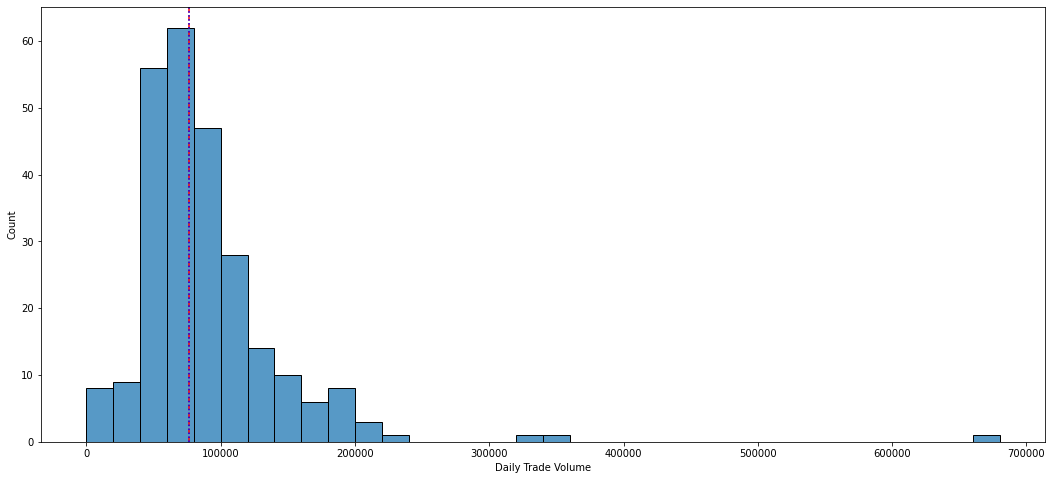

In [20]:
# for fun let's see this data and validate our assumptions
import matplotlib.pyplot as plt
import seaborn as sns

# plot hist
binsize = 20000
bins = [
    x for x in range(int(sorted_trade_volumes[0]),
                     int(sorted_trade_volumes[-1] + binsize), binsize)
]
fig, ax = plt.subplots(figsize=(18, 8))
sns.histplot(sorted_trade_volumes, ax=ax, bins=bins)
plt.axvline(upper_median, color='r', linestyle='dashed')
plt.axvline(lower_median, color='b', linestyle='dotted')
plt.xlabel("Daily Trade Volume")